In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

In [2]:
df = pd.read_csv('Train_Test_Time_Series.csv')
df.set_index('Date',inplace=True)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

In [446]:
columns_to_drop = ['Lag_1', 'Lag_2', 'Lag_3', 'Trading Volume (Target Variable)']
X_df = df.drop(columns=columns_to_drop)
y_df = df['Trading Volume (Target Variable)']

X_df_columns_names = list(X_df)

In [480]:
# Data Scaling
# Initialize the StandardScaler for scaling X
scaler = StandardScaler()

X_df_scaled = scaler.fit_transform(X_df)

X_df_scaled = pd.DataFrame(X_df_scaled)
pca = PCA(n_components=5)

# Fit the PCA model to the data and transform the data
X_df_scaled = pd.DataFrame(pca.fit_transform(X_df_scaled))

In [479]:
sub_df = df.iloc[:, 320:323]
sub_df = sub_df.reset_index()
sub_df = sub_df.drop(columns=['Date'])
scaler2 = StandardScaler()
sub_df = pd.DataFrame(scaler2.fit_transform(sub_df),columns= sub_df.columns)

In [463]:
X_df_scaled

,0,1,2,3,4
0,-19.927659,-0.083234,-0.094296,0.032490,-0.126630
1,-19.926295,-0.084434,-0.095326,0.034189,-0.127531
2,-19.925853,-0.082253,-0.093828,0.031721,-0.128083
3,-19.924156,-0.067441,-0.077358,0.021902,-0.132089
4,-19.920506,-0.067010,-0.075944,0.019707,-0.131757
...,...,...,...,...,...
2493,54.323590,4.523521,-0.013816,1.535366,1.958669
2494,54.456256,4.547756,-1.379514,1.311778,2.026471
2495,54.540113,4.329858,-2.020327,1.099651,1.617961
2496,54.787020,3.594587,-3.521071,0.329600,-0.231574


In [481]:
# Concatenate along columns (axis=1)
X_df_scaled = pd.concat([X_df_scaled, sub_df], axis=1)

In [482]:
 X_df_scaled.columns = X_df_scaled.columns.astype(str)

In [483]:
# Data partitioning

X_train = X_df_scaled.iloc[3:2000, :323]
X_test = X_df_scaled.iloc[2000:, :323]
y_train = df.iloc[3:2000,323:]
y_test = df.iloc[2000:,323:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1997, 8), (498, 8), (1997, 1), (498, 1))

In [484]:
X_test.tail()

,0,1,2,3,4,Lag_1,Lag_2,Lag_3
2493,54.323590,4.523521,-0.013816,1.535366,1.958669,NaN,NaN,NaN
2494,54.456256,4.547756,-1.379514,1.311778,2.026471,NaN,NaN,NaN
2495,54.540113,4.329858,-2.020327,1.099651,1.617961,NaN,NaN,NaN
2496,54.787020,3.594587,-3.521071,0.329600,-0.231574,NaN,NaN,NaN
2497,54.913021,3.577024,-3.923377,-0.389890,-0.730709,NaN,NaN,NaN


In [33]:
y_test.isna().sum().sum()

395

In [34]:
#y_test = y_test.to_frame()
#y_train = y_train.to_frame()
#⚠️ Should I do the same for y_train?

In [35]:
# y_test

In [36]:
# Optional
# y_test.head()
# x_test.head()

In [37]:
#MODEL

In [38]:
#Parameters to be tuned
    # Number and size of hidden layers
    # Activation function
    # Solver
    # Learning rate

In [39]:
#Sklearn model ~ Specify configuration
model_1=MLPRegressor(hidden_layer_sizes=(8,16,32),
                        activation='relu',
                        solver='adam',
                        shuffle=False,
                        random_state=5,
                        #learning_rate_init=0.001,
                        )
# if solver is 'sgd', 'learning_rate='adaptive' 
#gelu is a high used activation function, we can experiment here with that
#help(MLPRegressor)

In [40]:
y_train = y_train.squeeze().to_numpy()

In [41]:
#Model fit
model_1.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(8, 16, 32), random_state=5, shuffle=False)

             0         1         2         3         4         5         6  \
2450  2.612934  2.671940  2.480925 -2.641143  2.644018 -2.659662  2.632746   
2451  2.614196  2.674442  2.541202 -2.641590  2.645390 -2.671653  2.653419   
2452  2.617006  2.675139  2.567251 -2.647412  2.644188 -2.683082  2.686970   
2453  2.618598  2.675010  2.607122 -2.644512  2.646949 -2.702359  2.691405   
2454  2.619659  2.675036  2.612752 -2.643930  2.654646 -2.698862  2.731631   
2455  2.621351  2.675539  2.607122 -2.641725  2.655653 -2.694573  2.734611   
2456  2.826193  2.800526  2.172481 -2.641682  2.654513 -2.678939  2.772109   
2457  2.817848  2.834291  2.480757 -2.693824  2.657203 -2.684602  2.810033   
2458  2.795996  2.804795  2.772632 -2.785854  2.662334 -2.692158  2.814638   
2459  2.828946  2.829197  2.870582 -2.790939  2.677737 -2.700943  2.695379   
2460  2.785070  2.844983  2.485056 -2.788265  2.736178 -2.696884  2.643539   
2461  2.781370  2.845744  2.425759 -2.788209  2.751599 -2.696884

In [21]:
#Predictions
y_pred = model_1.predict(X_test)
y_pred

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [270]:
#⚠️ When to..
#Descaling the features
# x_test_descaled = scaler.inverse_transform(x_test_scaled)

In [22]:
y_test.reset_index()

,Date,Trading Volume (Target Variable)
0,2050,3.178032e+07
1,2051,6.474733e+07
2,2052,4.854908e+07
3,2053,1.014758e+08
4,2054,4.956983e+07
...,...,...
443,390,NaN
444,391,NaN
445,392,NaN
446,393,NaN


NameError: name 'y_pred' is not defined

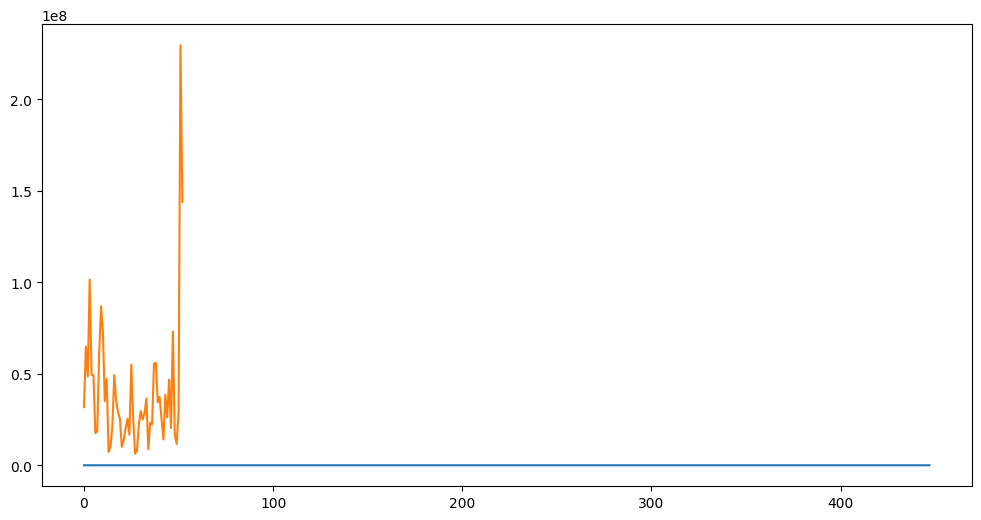

In [23]:
# Visualize Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.reset_index(), label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.xlabel('Days')
plt.ylabel('Trading Volume')
plt.legend()
plt.show()

In [24]:
# Performance measure
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.2f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

#R-squared (Coefficient of Determination)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

NameError: name 'y_pred' is not defined

In [313]:
#Perform Rolling Predictions

In [491]:
from sklearn.ensemble import RandomForestRegressor
model_2 = RandomForestRegressor(n_estimators=150, n_jobs=-1)

In [329]:
#Sklearn model ~ Specify configuration
model_2 = MLPRegressor(hidden_layer_sizes=(64,64),
                        activation='relu',
                        solver='adam',
                        shuffle=False,
                        # random_state=5,
                        # learning_rate_init=0.001,
                        )
# if solver is 'sgd', 'learning_rate='adaptive' 
#gelu is a high used activation function, we can experiment here with that
#help(MLPRegressor)

In [355]:
X_train.iloc[:,:-2]

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,Lag_1
3,-19.924156,-0.067441,-0.077358,0.021902,-0.132089,-0.071784,-0.039933,-0.040737,-0.040715,0.014849,...,-0.008906,0.005651,0.008083,0.008060,0.019324,0.005499,0.011828,0.003458,-0.002941,29459968.91
4,-19.920506,-0.067010,-0.075944,0.019707,-0.131757,-0.069504,-0.039033,-0.041452,-0.041348,0.015895,...,-0.002438,0.005577,0.008051,0.008497,0.020879,0.006544,0.010767,0.002318,0.000404,13630323.78
5,-19.913437,-0.064641,-0.078136,0.023764,-0.126254,-0.072608,-0.048524,-0.046867,-0.033686,0.020674,...,-0.005704,0.007822,0.009848,0.009321,0.019148,0.005316,0.009894,0.001340,-0.001848,9224729.90
6,-19.912512,-0.069752,-0.074011,0.019350,-0.126876,-0.079789,-0.051675,-0.047380,-0.029002,0.016839,...,-0.007425,0.005394,0.007637,0.008810,0.020932,0.004431,0.009989,0.002711,-0.001551,5470214.99
7,-19.912387,-0.070432,-0.075237,0.022619,-0.123276,-0.085486,-0.052242,-0.039914,-0.032810,0.015282,...,-0.006325,0.005952,0.006715,0.008014,0.020112,0.005246,0.011837,0.001873,-0.001765,3455365.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,11.503623,-1.721732,0.349288,0.603693,-0.101134,-0.062729,-0.483890,-0.105368,-0.076709,-0.189997,...,0.045332,0.084147,-0.010625,-0.054243,-0.112592,-0.054857,0.008296,-0.047364,0.029850,95652211.96
1992,11.421793,-2.008989,0.248661,0.905019,-0.112122,-0.246410,-0.391256,-0.162908,0.069004,-0.008734,...,0.014492,0.083970,-0.036939,-0.053984,-0.137481,-0.047559,0.012582,0.022950,-0.023448,51965944.96
1993,11.198544,-2.107679,-0.375581,0.895360,0.592741,-0.471618,-0.347178,-0.165519,0.290402,0.490730,...,0.173644,0.027328,-0.083625,-0.042944,-0.117584,0.053627,-0.056646,0.035864,0.009129,46955763.15
1994,11.000473,-1.810603,-0.491829,1.284454,0.554824,-0.237879,-0.328668,0.139397,0.171212,0.564075,...,-0.046657,-0.080802,-0.039554,-0.056381,-0.055141,0.043536,-0.094839,0.023821,0.050222,22671301.57


In [492]:
predictions = []
current_X_test = X_test.copy().iloc[:,:]  # Copy to avoid modifying the original test set
current_X_train = X_train.copy().iloc[:,:]
current_y_train = pd.DataFrame(y_train.copy())

In [493]:
y_train_ravel = y_train.squeeze().to_numpy()

In [494]:
#Model fit
model_2.fit(current_X_train, y_train_ravel)

RandomForestRegressor(n_estimators=150, n_jobs=-1)

In [419]:
current_X_test

,0,1,2,Lag_1,Lag_2,Lag_3
2000,10.727198,-2.856418,-0.464934,6.061699e+07,8.096774e+07,6.572039e+07
2001,10.521406,-1.986617,0.723679,5.586317e+07,6.061699e+07,8.096774e+07
2002,10.513844,-1.820674,1.174371,6.473180e+07,5.586317e+07,6.061699e+07
2003,10.500984,-2.242880,1.081375,9.486392e+07,6.473180e+07,5.586317e+07
2004,10.447681,-2.665065,1.549916,9.138861e+07,9.486392e+07,6.473180e+07
...,...,...,...,...,...,...
2493,54.323590,4.523521,-0.013816,2.296660e+08,2.364604e+08,2.636124e+08
2494,54.456256,4.547756,-1.379514,2.554370e+08,2.296660e+08,2.364604e+08
2495,54.540113,4.329858,-2.020327,2.949761e+08,2.554370e+08,2.296660e+08
2496,54.787020,3.594587,-3.521071,3.092964e+08,2.949761e+08,2.554370e+08


In [377]:
current_X_test.iloc[0,:]

0        1.082612e+01
1       -2.281747e+00
2       -5.696753e-01
3        1.397847e+00
4        4.206549e-01
Lag_1    4.667070e+07
Lag_2    1.544761e+07
Lag_3    2.267130e+07
Name: 1996, dtype: float64

In [472]:
model_2.predict(current_X_test.iloc[2,:].values.reshape(1,-1))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([54625857.76485714])

In [379]:
current_X_test

,0,1,2,3,4,Lag_1,Lag_2,Lag_3
1996,10.826122,-2.281747,-0.569675,1.397847,0.420655,46670704.89,15447614.51,22671301.57
1997,10.794671,-2.499263,-0.760462,1.345083,0.192238,41271528.19,46670704.89,15447614.51
1998,10.830717,-2.922278,-0.465583,0.788972,-0.071921,65720386.13,41271528.19,46670704.89
1999,10.802869,-3.114842,-0.622166,0.929344,-0.211073,80967735.01,65720386.13,41271528.19
2000,10.727198,-2.856418,-0.464934,0.630444,-0.141359,60616987.33,80967735.01,65720386.13
...,...,...,...,...,...,...,...,...
2493,54.323590,4.523521,-0.013816,1.535366,1.958669,NaN,NaN,NaN
2494,54.456256,4.547756,-1.379514,1.311778,2.026471,NaN,NaN,NaN
2495,54.540113,4.329858,-2.020327,1.099651,1.617961,NaN,NaN,NaN
2496,54.787020,3.594587,-3.521071,0.329600,-0.231574,NaN,NaN,NaN


In [380]:
pd.isna(current_X_test.iloc[-1,-1])

True

In [381]:
len(current_X_test)

502

In [476]:
p = model_2.predict(current_X_test.iloc[2,:].values.reshape(1,-1))
scaler2.transform(np.array([p,p,p]).reshape(1,-1))[0]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([-0.38275926, -0.38275926, -0.38275926])

In [478]:
current_X_test

,0,1,2,3,4,0,1,2
2000,10.727198,-2.856418,-0.464934,0.630444,-0.141359,-0.329917,-0.150420,-0.284904
2001,10.521406,-1.986617,0.723679,-0.039926,0.625455,-0.495447,-0.329917,-0.150420
2002,10.513844,-1.820674,1.174371,-0.563292,0.653779,-0.524768,-0.495447,-0.329917
2003,10.500984,-2.242880,1.081375,-0.214927,0.424079,-0.596345,-0.524768,-0.495447
2004,10.447681,-2.665065,1.549916,0.300119,0.130065,-0.572055,-0.596345,-0.524768
...,...,...,...,...,...,...,...,...
2493,54.323590,4.523521,-0.013816,1.535366,1.958669,NaN,NaN,NaN
2494,54.456256,4.547756,-1.379514,1.311778,2.026471,NaN,NaN,NaN
2495,54.540113,4.329858,-2.020327,1.099651,1.617961,NaN,NaN,NaN
2496,54.787020,3.594587,-3.521071,0.329600,-0.231574,NaN,NaN,NaN


In [495]:
for i in range (len(current_X_test)):
    # Predict the next value
    pred = model_2.predict(current_X_test.iloc[i,:].values.reshape(1,-1))
    predictions.append(pred[0])
    scaled_pred = scaler2.transform(np.array([pred[0],pred[0],pred[0]]).reshape(1,-1))[0]
    if i+1 < len(current_X_test) :#and pd.isna(current_X_test.iloc[i+1,-3]) :
        current_X_test.iloc[i + 1, current_X_test.columns.get_loc('Lag_1')] = scaled_pred[0]
    if i+2 < len(current_X_test):# and pd.isna(current_X_test.iloc[i+2,-2]):
        current_X_test.iloc[i + 2, current_X_test.columns.get_loc('Lag_2')] = scaled_pred[1]
    if i+3 < len(current_X_test):# and pd.isna(current_X_test.iloc[i+3,-1]):
        current_X_test.iloc[i + 3, current_X_test.columns.get_loc('Lag_3')] = scaled_pred[2]
    
    # Add the predicted value to the training set
    # new_row = pd.DataFrame(current_X_test).iloc[i:i+1].copy()
    # new_target = pd.DataFrame(pred, index=new_row.index, columns=['Trading Volume (Target Variable)'])
    
    # # Append the new row to the training set and retrain the model (optional)
    # current_X_train = pd.concat([pd.DataFrame(current_X_train), new_row])
    # current_y_train = pd.concat([current_y_train, new_target])
    # if (i + 1) % 10 == 0:  # Retrain after every 10 predictions (for example)
    #     new_rows = pd.DataFrame(current_X_test[i-9:i+1])
    #     # new_targets = predictions[-10:]
    #     new_targets = pd.DataFrame(predictions[-10:], index=new_rows.index, columns=['Trading Volume (Target Variable)'])
    #     current_X_train = pd.concat([pd.DataFrame(current_X_train), new_rows])#np.vstack([current_X_train, new_rows])
    #     current_y_train = pd.concat([current_y_train, new_targets])
    #     model_2.fit(current_X_train, current_y_train)

    # print(pred, )
    
# Convert predictions to a DataFrame or Series
predictions = pd.Series(predictions)

# Evaluate predictions
print(predictions)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frame

0      5.869919e+07
1      6.754968e+07
2      7.163520e+07
3      7.146634e+07
4      7.029828e+07
           ...     
493    3.160660e+08
494    3.583047e+08
495    3.647002e+08
496    3.927497e+08
497    4.732241e+08
Length: 498, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [363]:
current_X_test.tail()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,Lag_1,Lag_2,Lag_3
2493,54.323590,4.523521,-0.013816,1.535366,1.958669,-0.211524,0.158195,-1.167588,-0.717343,-0.107964,...,-0.424493,-0.103304,0.060291,0.088456,0.072022,0.147885,-0.052771,4.298277e+08,3.992477e+08,4.020713e+08
2494,54.456256,4.547756,-1.379514,1.311778,2.026471,0.140627,0.056889,-1.091311,-0.910378,-0.675529,...,0.049261,-0.096612,0.069769,-0.062561,-0.033894,0.055893,-0.018353,3.833108e+08,4.298277e+08,3.992477e+08
2495,54.540113,4.329858,-2.020327,1.099651,1.617961,0.550723,-0.115716,-0.838812,-0.638197,-0.161162,...,0.290591,-0.113928,0.104904,0.114519,-0.061580,0.140358,0.028188,3.089521e+08,3.833108e+08,4.298277e+08
2496,54.787020,3.594587,-3.521071,0.329600,-0.231574,1.570541,-0.705903,0.025297,0.325982,1.107297,...,-0.099958,-0.096558,0.021859,0.114056,0.219163,0.161256,0.140538,2.857659e+08,3.089521e+08,3.833108e+08
2497,54.913021,3.577024,-3.923377,-0.389890,-0.730709,1.834986,-0.759089,0.275372,-0.102576,-0.094622,...,-0.064492,-0.112907,0.139526,-0.148664,0.292165,-0.096207,0.126793,2.613940e+08,2.857659e+08,3.089521e+08


In [364]:
current_y_train.iloc[2100:].tail()

,Trading Volume (Target Variable)
Date,


In [365]:
predictions

0      6.171402e+07
1      5.663442e+07
2      7.344141e+07
3      8.413746e+07
4      6.925810e+07
           ...     
497    3.833108e+08
498    3.089521e+08
499    2.857659e+08
500    2.613940e+08
501    4.617727e+08
Length: 502, dtype: float64

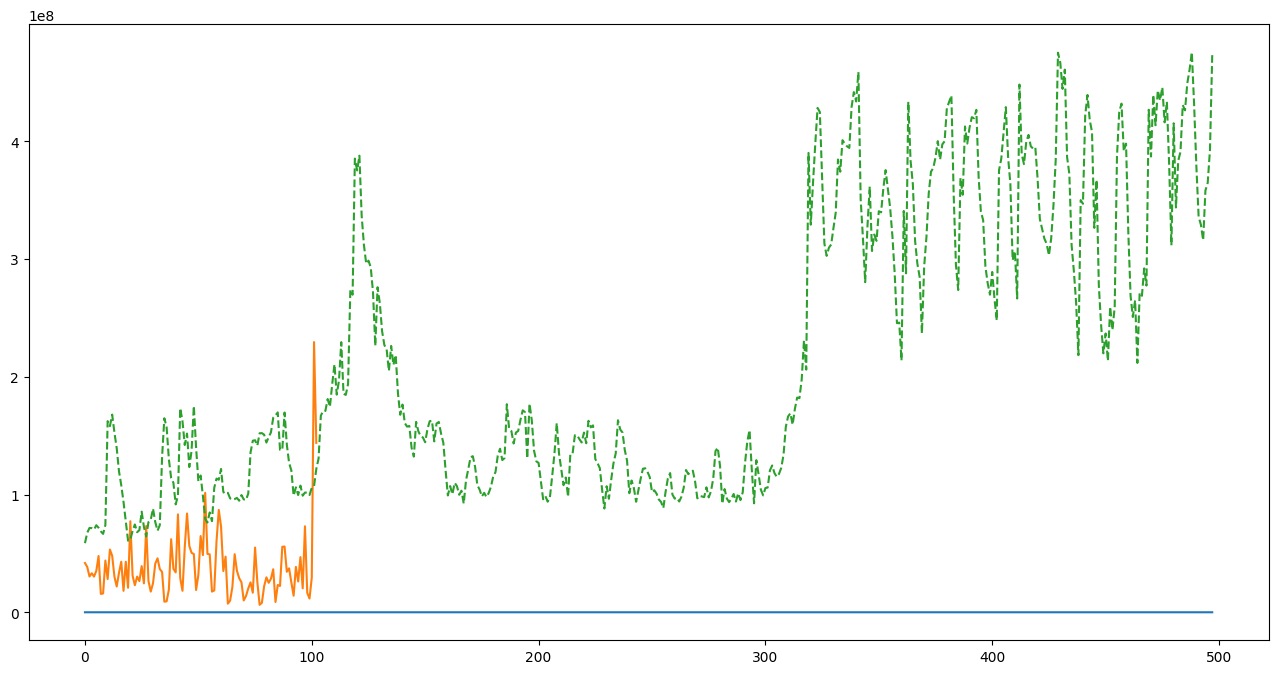

In [496]:
plt.figure(figsize=(16, 8))
plt.plot(y_test.reset_index(), label='Actual')
#plt.plot(y_pred3, label='Predicted')
plt.plot(predictions, label='rolling Predicted', linestyle='--')

In [497]:
predictions

0      5.869919e+07
1      6.754968e+07
2      7.163520e+07
3      7.146634e+07
4      7.029828e+07
           ...     
493    3.160660e+08
494    3.583047e+08
495    3.647002e+08
496    3.927497e+08
497    4.732241e+08
Length: 498, dtype: float64

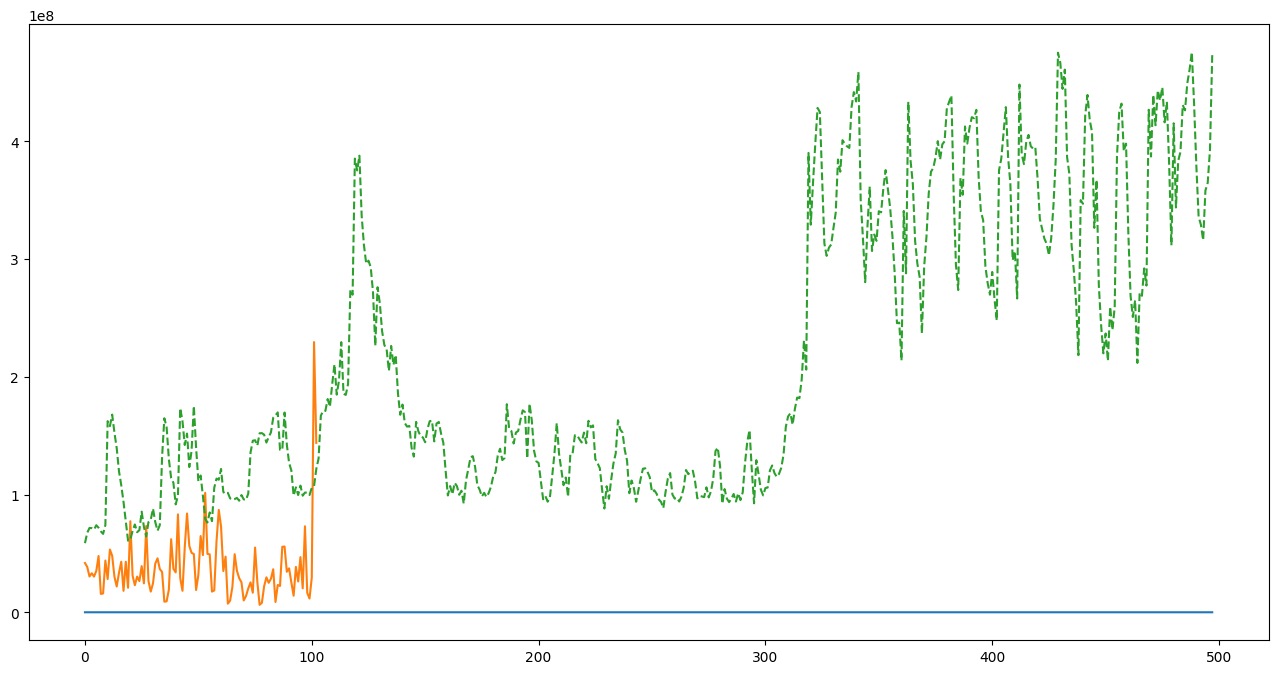

In [498]:
#Visualize Predictions
plt.figure(figsize=(16, 8))
plt.plot(y_test.reset_index(), label='Actual')
#plt.plot(y_pred3, label='Predicted')
plt.plot(predictions, label='rolling Predicted', linestyle='--')

In [ ]:
#2️⃣ Feature importance
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

perm_imp=permutation_importance(estimator=model_2,
                                X=x_test,
                                y=y_test,
                                scoring='neg_mean_squared_error',
                                random_state=123)

# Assuming you have already calculated permutation importance and stored it in perm_imp

# Sort feature importances in descending order
sorted_importances_mean = perm_imp.importances_mean.argsort()[::-1]

# Get the feature names corresponding to the sorted importances
sorted_feature_names = x_test.columns[sorted_importances_mean]

# Get the sorted importances values
sorted_importance_values = perm_imp.importances_mean[sorted_importances_mean]

# Print the sorted feature names and their corresponding importances
for feature, importance in zip(sorted_feature_names, sorted_importance_values):
    print(f"Feature: {feature}, Importance: {importance}")

In [ ]:
#2️⃣ Model 

In [ ]:
#2️⃣ Sklearn model ~ Specify configuration
model_2=MLPRegressor(hidden_layer_sizes=(100,50),
                        activation='logistic',
                        solver='sgd',
                        #learning_rate_init=0.001,
                        )
# if solver is 'sgd', 'learning_rate='adaptive' 
#gelu is a high used activation function, we can experiment here with that
#help(MLPRegressor)

In [ ]:
#2️⃣ Model fit
model_2.fit(x_train, y_train)
#⚠️Why?

In [ ]:
#2️⃣ Predictions
y_pred_2=model_2.predict(x_test)
y_pred_2

In [ ]:
#2️⃣ Visualize Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test['Trading Volume (Target Variable)'], label='Actual')
plt.plot(y_test.index, y_pred_2, label='Predicted', linestyle='--')
plt.xlabel('Days')
plt.ylabel('Trading Volume')
plt.legend()
plt.show()

In [ ]:
#2️⃣ Performance measure
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred_2)
print(f"MAE: {mae:.2f}")

# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_2)
print(f"MSE: {mse:.2f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_2))
print(f"RMSE: {rmse:.2f}")

#R-squared (Coefficient of Determination)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_2)
print(f"R-squared: {r2:.2f}")

In [ ]:
#2️⃣ Feature importance
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

perm_imp=permutation_importance(estimator=model_2,
                                X=x_test,
                                y=y_test,
                                scoring='neg_mean_squared_error',
                                random_state=123)

# Assuming you have already calculated permutation importance and stored it in perm_imp

# Sort feature importances in descending order
sorted_importances_mean = perm_imp.importances_mean.argsort()[::-1]

# Get the feature names corresponding to the sorted importances
sorted_feature_names = x_test.columns[sorted_importances_mean]

# Get the sorted importances values
sorted_importance_values = perm_imp.importances_mean[sorted_importances_mean]

# Print the sorted feature names and their corresponding importances
for feature, importance in zip(sorted_feature_names, sorted_importance_values):
    print(f"Feature: {feature}, Importance: {importance}")

In [ ]:
# Grid Search
#Step 1
param_grid= {
    'hidden_layer_sizes': [(50,), (100,), (50,25), (100,50)],
    'activation': ['relu', 'logistic'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01, 0.05]
}
# Create the MLPRegressor model
mlp = MLPRegressor(max_iter=1000, random_state=42)

In [ ]:
#Step 2
#Define scoring functions
scoring = {
    'r2_score': make_scorer(r2_score),
    'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
    'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
    'explained_variance': make_scorer(explained_variance_score)
}

# Perform grid search
grid_search = GridSearchCV(estimator=mlp, 
                            param_grid=param_grid,
                            scoring=scoring,
                            refit='r2_score')
grid_search.fit(x_train,y_train)

In [ ]:
#Step 3
# See/Find the best parameters
print('Best r2 Score: ',grid_search.best_score_)
print('Best parameters: ',grid_search.best_params_)
best_model=grid_search.best_estimator_

In [ ]:
#⚠️Should I do the grid search first or the feature selection based on the first model ? 

In [ ]:
#⚠️ How to select the best features and store them for my new model?
# Assuming feature_names is a list containing the names of the specific features you want to include
new_features = ['92','121','46','145','180','112','207','53','229','262','226','120','10','266','70',
                '279','50','111','251','261','313','282','210','72','17','74','104','168','38','289',
                '285','110','138','106','146','101','233','116','155','47','219','271','147','65','222',
                '211','169','250','22','309','231','187','55','260','171','194','312','86','62','255',
                '157','230','184','154','182','159','300','122','281','83','265','200','252','11','12']

# Select the specific features from the original DataFrame
X_selected = df[new_features]
X_selectedd search or the feature selection? put it in a new 

In [ ]:
#Step 4
#Model Predict
y_pred_bm=best_model.predict(x_test)

In [ ]:
# Visualize Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test['Trading Volume (Target Variable)'], label='Actual')
plt.plot(y_test.index, y_pred_bm, label='Predicted', linestyle='--')
plt.xlabel('Days')
plt.ylabel('Trading Volume')
plt.legend()
plt.show()

In [ ]:
#⚠️ Scaling process (what goes first?) and how to get the output 
#⚠️ do I need lags? 

In [ ]:
#Test/Prediction Data
df_predict = pd.read_csv('Test_Time_Series.csv')
df_predict.set_index('Date',inplace=True)
columns_names = list(df)
df_predict

In [ ]:
# Now, for new data 'X_new', descale the features
X_new_scaled = scaler.transform(X_new)  # Scale new data using the same scaler
X_descaled = scaler.inverse_transform(X_new_scaled)